<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 例題3.2

例題3.1の処理をPythonでコーディングせよ．


データの準備と表示

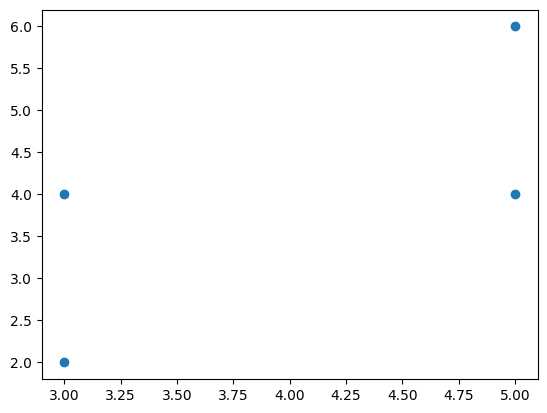

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[3,2],[3,4],[5,4],[5,6]])
plt.scatter(X[:,0], X[:,1])

numpyを用いた標準化

- マニュアル
  - [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
  - [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

標準化後のデータの表示

機械学習ライブラリ scikit-learn を利用した標準化のコード

- マニュアル
  - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

## 例題3.5

例題3.4の処理を Python でコーディングせよ．

numpyで標準化後のデータから共分散行列を計算し、その共分散行列の第1固有ベクトルを計算

- マニュアル
  - [numpy.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)
  - [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

第1固有ベクトルを用いた1次元データへの変換

機械学習ライブラリ scikit-learn を利用した主成分分析のコード

- マニュアル
  - [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

## 解答例


In [3]:
# 例題3.2 標準化
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # ndarrayのブロードキャスト
X_normalized

array([[-1.        , -1.41421356],
       [-1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  1.41421356]])

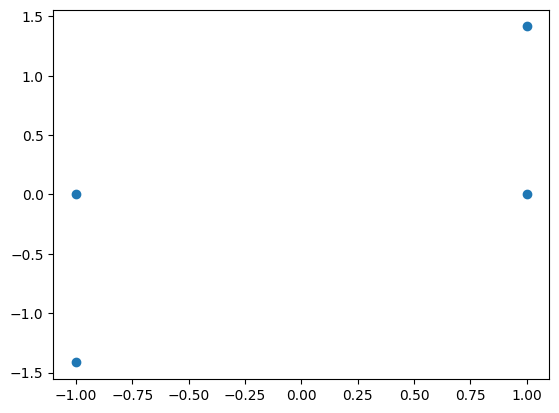

In [4]:
# 例題3.2 表示
plt.scatter(X_normalized[:,0], X_normalized[:,1])

In [6]:
# 例題3.2 StandardScalerを使ったコード
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_normalized = scaler.fit_transform(X)
X2_normalized

array([[-1.        , -1.41421356],
       [-1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  1.41421356]])

In [7]:
#例題3.5 第1固有ベクトルを計算

S = np.cov(X_normalized, rowvar=False, bias=True) # 共分散行列の計算 rowvar:データの並ぶ方向 bias:標本分散 
eig_val, eig_vec = np.linalg.eig(S)  #固有値と固有ベクトルの計算
A = eig_vec[:,0]  # 第1固有ベクトル
A

array([0.70710678, 0.70710678])

In [8]:
#例題3.5 第1固有ベクトルを用いた1次元データへの変換
X1 = X_normalized @ A
X2 = X1 / np.std(X1)
X2

array([-1.30656296, -0.5411961 ,  0.5411961 ,  1.30656296])

In [9]:
#例題3.5 PCAを使ったコード
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X1 = pca.fit_transform(X_normalized)
X2 = X1[:,0] / np.std(X1)
X2

array([-1.30656296, -0.5411961 ,  0.5411961 ,  1.30656296])